# MEC Road Race 1 Pacing Data
### Can't see the graphs? Try viewing them [here](https://nbviewer.jupyter.org/github/jimprince/analysis/blob/master/MEC_Race_Pacing/MEC_Race.ipynb?flush_cache=true)


Mountain Equipment Coop (MEC) is an outdoor retailer who sponsors several races a year in the locales where they have stores. I participated in the 5K in Calgary in January 2019 and finished with an abysmal time. I wanted to look at the data and see if there were any trends that jumped out at me and specifically I wanted to know how pace (minutes/K) varied from distance to distance. The distances offered in this race were 5K, 10K and a half marathon (21k).

Key Question: To graduate from a 5K to a 10K is it more important to focus on keeping the same pace longer or to speed up your pace? (21K data is shown for interest's sake)

Answer: From the data it seems that from 5K to 10K there is a major difference in pace, moving from a mean of 6.8min/km to a mean of 5.6min/km. That translates to the average person running a 10K will run a 5K at least 5 mintues faster (and probably even faster becasue they could maintain a faster pace for less time) than the average 5k participant.

## TODO:

1. Ensure all axis are labeled correctly - Done
2. Hide code blocks to make readable to non-code literate people - Can't do in jupyter notebook. Have to read more about how to present to non-literate people. Thinking of doing a medium blog with embeded graphs.

&nbsp;

-----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.offline import iplot
from plotly import tools
%matplotlib inline
offline.init_notebook_mode(connected=True)

In [2]:
column_names = ["e", "place", "name", "div", "time", "bib", "d", "c", "b", "a", "pace_km", "pace_miles"]
five =  pd.read_csv("5km.CSV", names=column_names)
ten =  pd.read_csv("10km.CSV", names=column_names)
half =  pd.read_csv("21km.CSV", names=column_names)

In [3]:
# Implementation of the Arduino map function, b/c I guess it doesn't exist in python
def map(x, in_min, in_max, out_min, out_max):
    return round((x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)

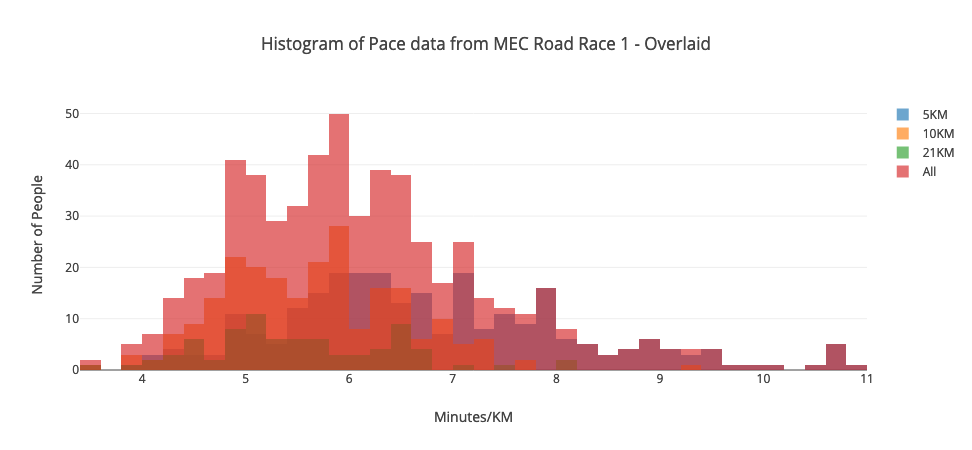

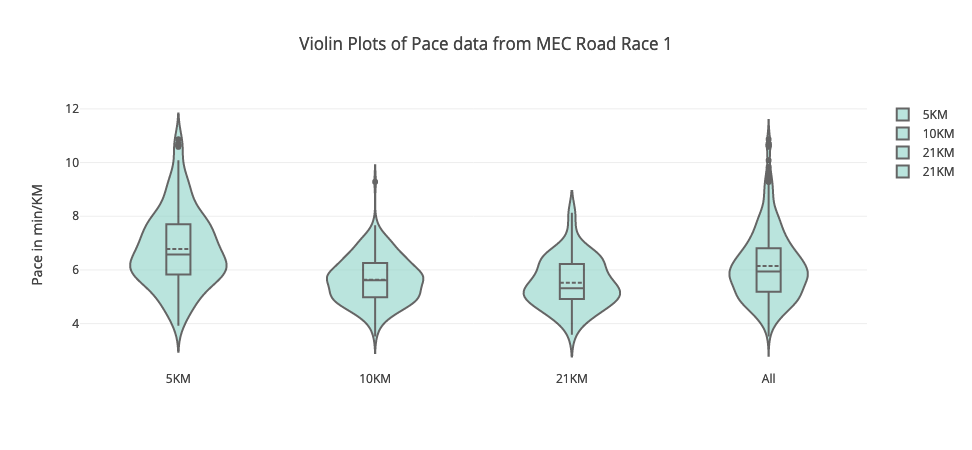

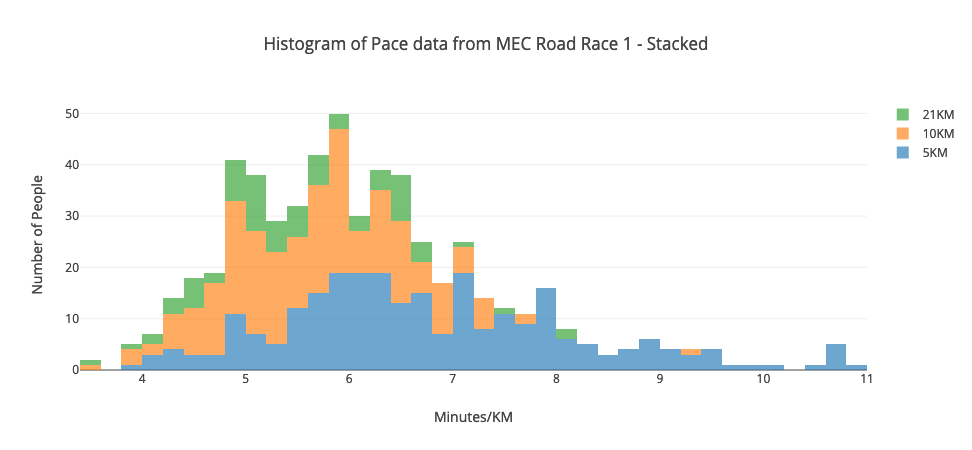

In [31]:
races = [five, ten, half]
races_str = ["5KM", "10KM", "21KM"]
histograms = []
violins = []
all_races = pd.DataFrame()
bins = dict(
            start='3',
            end='12',
            size= '0.2')

for race, race_str in zip(races, races_str):
    new = race["pace_km"].str.split(":", n = 1, expand = True)
    new.columns = ["m", "s"]
    new.s = pd.to_numeric(new.s)
    new.m = pd.to_numeric(new.m)
    race["pace_s"] = new.m * 60 + new.s
    race["pace_m"] = race.pace_s / 60.0
    race["distance"] = race_str
    all_races.append(pd.DataFrame({"A": range(3)}))
    histograms.append(
        go.Histogram(
            x=race["pace_m"],
            name=race_str,
            opacity=0.65,
            xbins=bins,
                )
    )
    
    violins.append({
            "type": 'violin',
            "y": race["pace_m"],
            "x" : race["distance"],
            "name": race_str,
            "box": {
                "visible": True
            },
            "line": {
                "color": 'black'
            },
            "meanline": {
                "visible": True
            },
            "fillcolor": '#8dd3c7',
            "opacity": 0.6,
            "x0": 'Total Bill'
        })

all_races = pd.concat([five, ten, half])
all_races["distance"] = "All"
# print(all_races)


histograms.append(
    go.Histogram(
        x=all_races["pace_m"],
        name="All",
        opacity=0.65,
        xbins=bins,
    )
)

violins.append({
            "type": 'violin',
            "y": all_races["pace_m"],
            "x" : all_races["distance"],
            "name": race_str,
            "box": {
                "visible": True
            },
            "line": {
                "color": 'black'
            },
            "meanline": {
                "visible": True
            },
            "fillcolor": '#8dd3c7',
            "opacity": 0.6,
            "x0": 'Total Bill'
        })
    
    
data = histograms
layout = go.Layout(barmode='overlay', title="Histogram of Pace data from MEC Road Race 1 - Overlaid")
layout["xaxis.title"] = "Minutes/KM"
layout["yaxis.title"] = "Number of People"
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='stacked-subplots-shared-xaxes')

    

data2 = violins
fig2 = {
    "data": data2,
    "layout" : {
        "title": "Violin Plots of Pace data from MEC Road Race 1",
        "yaxis": {
            "zeroline": False,
            "title": "Pace in min/KM"
        }
    }
}
offline.iplot(fig2, filename='stacked-subplots-shared-xaxes')


data3 = histograms[:-1]
layout3 = go.Layout(barmode='stack', title="Histogram of Pace data from MEC Road Race 1 - Stacked")
layout3["xaxis.title"] = "Minutes/KM"
layout3["yaxis.title"] = "Number of People"
fig3 = go.Figure(data=data3, layout=layout3)
offline.iplot(fig3, filename='stacked-subplots-shared-xaxes')
